## 17 Pandas Exercises

In [115]:
# Importing the libraries I'll need.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
# Testing out what 

pd.Series([1, 2, 'five'])

0       1
1       2
2    five
dtype: object

In [4]:
print_test = pd.Series([1, 2, 'five'])
print(print_test)

0       1
1       2
2    five
dtype: object


### Vectorized Operations

- This is the point where the concept of vectorized operations was cemented in my mind. I did a couple of simply examples to help lock it up.

In [5]:
seriesone = pd.Series([2, 3, 5, 8])
seriesone

0    2
1    3
2    5
3    8
dtype: int64

In [8]:
seriesone.head()

0    2
1    3
2    5
3    8
dtype: int64

In [9]:
seriesone.tail()

0    2
1    3
2    5
3    8
dtype: int64

## Exercices

### Question Set #1

In [26]:
# Name the variable that holds the series fruits.

fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

In [16]:
# Run .describe() on the series to see what describe returns for a series of strings.

fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [26]:
# Run the code necessary to produce only the unique fruit names.

fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [27]:
# Determine how many times each value occurs in the series.
num_fruit = fruits.value_counts()
num_fruit

kiwi                4
mango               2
honeydew            1
pineapple           1
papaya              1
tomato              1
honeycrisp apple    1
gala apple          1
gooseberry          1
watermelon          1
blackberry          1
strawberry          1
blueberry           1
dtype: int64

In [28]:
# Determine the most frequently occurring fruit name from the series.

# I need to know what data type I'm working with to tailor what I'm writing in my code:

type(num_fruit)

# Ok, so I have a Series, meaning I need to figure out how to grab the "name" from the list instead of just the max number...

pandas.core.series.Series

In [29]:
# Courtesy Faith's notebook, as pointed out by Ryvyn: nsmallest and nlargest. Nice.
# Ok, now that I have a pandas Series, I can use nlargest now!
num_fruit.nlargest(1, keep='all')

# I'm actually not sure I had to go through all that, as according to the nlargest pandas' documentation, it works on dataframes as well... I'll try it a different way for the next question.

kiwi    4
dtype: int64

In [30]:
# Determine the least frequently occurring fruit name from the series.

num_fruit.nsmallest(1, keep='all')

honeydew            1
pineapple           1
papaya              1
tomato              1
honeycrisp apple    1
gala apple          1
gooseberry          1
watermelon          1
blackberry          1
strawberry          1
blueberry           1
dtype: int64

In [33]:
# Alternatively, I could skip using the variable I created with:

fruits.value_counts().nsmallest(1, keep='all')

# This is probably more 'pythonic'.

honeydew            1
pineapple           1
papaya              1
tomato              1
honeycrisp apple    1
gala apple          1
gooseberry          1
watermelon          1
blackberry          1
strawberry          1
blueberry           1
dtype: int64

In [36]:
# Write the code to get the longest string from the fruits series.

fruits[fruits.str.len().argmax()]

# The only thing to be aware of is .argmax() only returns the first instance of the longest string, so if I have a "tie" of the longest name, then I'll need to use Faith's method:
max(fruits.to_list(), key = len)
# Which is finding the longest string, and then passing that into a list, and then checking the key, which is len (max length)

'honeycrisp apple'

In [179]:
# Find the fruit(s) with 5 or more letters in the name.

fruits[fruits.str.len() > 4]

# Yeah I spent waaaaaay too much time on this. Was way over-thinking what I needed to do. But I figured it out on my own.

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [181]:
# Capitalize all the fruit strings in the series.
# Trick on this one is to capitalize all new words - python doesn't see space " " as a new string... Need to figure this one out.

fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [38]:
# Cristian's answer:

fruits.str.title()

# Nice, it captializes each word. Recognizes the space as creating a new word in the string.

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala Apple
5     Honeycrisp Apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [186]:
# Count the letter "a" in all the fruits (use string vectorization)

fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [213]:
# Output the number of vowels in each and every fruit.

fruits.str.count('[aeiou]')

# So don't fully understand this, but it seems to work. 
# Where I got this:
# https://stackoverflow.com/questions/49234374/how-to-count-vowels-and-consonants-in-pandas-dataframe-both-uppercase-and-lower

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [267]:
fruits[fruits.str.count('[aeiou]') > 0]

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [268]:
print(fruits)

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object


In [218]:
# I want to come back and figure out how the function would work using .apply()

def count_vowels(c):
    vowels = ['aeiou']
    if c in vowels:
        return True
    else:
        return False

In [42]:
# Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

fruits.apply(lambda n: n if n.count('o') > 1 else False)

0          False
1          False
2          False
3          False
4          False
5          False
6         tomato
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15    gooseberry
16         False
dtype: object

In [44]:
#ok, so didn't get the above quite right:

fruits[fruits.apply(lambda n: n.count('o') > 1)]

# What I learned: Since I'm dealing with Series, I don't need the extra if statment. That is too complicated.

6         tomato
15    gooseberry
dtype: object

In [245]:
# Write the code to get only the fruits containing "berry" in the name
# Reference for this solution:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

fruits[fruits.str.contains('berry')]


2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [247]:
# Write the code to get only the fruits containing "apple" in the name
# Note the key word in plain English: "containing". Taking that hint to look for a function that does what the question is asking me to do.

fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [47]:
# Which fruit has the highest amount of vowels?

fruits[fruits.str.count('[aeiou]').argmax()]

# Again, I should utilize idxmax() in future, in case there are multiple largest elements in the Series.

'honeycrisp apple'

In [48]:
vowels_counts_list = fruits.str.count(r'[aeiou]')
vowels_counts_list

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [117]:
# I like these solutions from Faith:

vowels_counts_list.idxmax()

5

In [118]:
fruits.iloc[5]

'honeycrisp apple'

In [119]:
vowels_counts_max = (fruits.str.count(r'[aeiou]')).max()
vowels_counts_max

5

### Question Set #2

#### Use pandas to create a Series from the following data:

- ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

In [56]:
data_series = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [57]:
print(data_series)

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object


In [58]:
# What is the data type of the series?

type(data_series)

pandas.core.series.Series

In [59]:
# Use series operations to convert the series to a numeric data type.
# Need to remove the "$" sign first, then I can convert to a float().

data_series = data_series.str.replace("$","")
data_series = data_series.str.replace(",","")
data_series

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4      2121418.3
5      1260813.3
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12     4513644.5
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: object

In [60]:
# Convert to float()

data_series = data_series.astype('float')

In [62]:
data_series_two = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [64]:
# Method Chaining: Very powerful.

data_series_two.str.replace('$','').str.replace(',','').astype('float')

# This is very cool. Will practice method chaining more as I continue learning to code.

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [295]:
# What is the maximum value? The minimum?

max_value = data_series.max()
min_value = data_series.min()
print(max_value)
print(min_value)

4789988.17
278.6


In [301]:
# Bin the data into 4 equally sized intervals and show how many values fall into each bin.

data_series.describe()

count    2.000000e+01
mean     2.284406e+06
std      1.735261e+06
min      2.786000e+02
25%      7.259403e+05
50%      1.940065e+06
75%      4.188482e+06
max      4.789988e+06
dtype: float64

In [306]:
print(data_series)

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64


In [329]:
binned_data = pd.cut(data_series, 5)
binned_data

0         (-4511.11, 958220.514]
1         (-4511.11, 958220.514]
2         (-4511.11, 958220.514]
3      (3832046.256, 4789988.17]
4     (1916162.428, 2874104.342]
5      (958220.514, 1916162.428]
6         (-4511.11, 958220.514]
7      (958220.514, 1916162.428]
8      (3832046.256, 4789988.17]
9     (1916162.428, 2874104.342]
10        (-4511.11, 958220.514]
11     (3832046.256, 4789988.17]
12     (3832046.256, 4789988.17]
13    (2874104.342, 3832046.256]
14     (958220.514, 1916162.428]
15     (3832046.256, 4789988.17]
16     (3832046.256, 4789988.17]
17    (1916162.428, 2874104.342]
18        (-4511.11, 958220.514]
19        (-4511.11, 958220.514]
dtype: category
Categories (5, interval[float64]): [(-4511.11, 958220.514] < (958220.514, 1916162.428] < (1916162.428, 2874104.342] < (2874104.342, 3832046.256] < (3832046.256, 4789988.17]]

In [315]:
binned_data = pd.cut(data_series, 4)
binned_data.value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

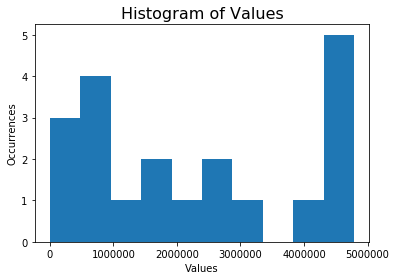

In [324]:
# Plot a histogram of the data. Be sure to include a title and axis labels.

plt.hist(data_series)
plt.xlabel("Values")
plt.ylabel("Occurrences")
plt.title("Histogram of Values", fontsize = 16)


plt.show()

### 3. Use pandas to create a Series from the following exam scores:

In [2]:
# Use pandas to create a Series from the following exam scores:

scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [19]:
type(scores)

pandas.core.series.Series

In [3]:
scores

0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64

In [10]:
# What is the minimum exam score? The max, mean, median?

print(f"The minimum score is: {scores.min()}")
print(f"the maxmimum score is: {scores.max()}")
print(f"The average score is: {scores.mean()}")
print(f"The median score is: {scores.median()}")

The minimum score is: 60
the maxmimum score is: 96
The average score is: 78.15
The median score is: 79.0


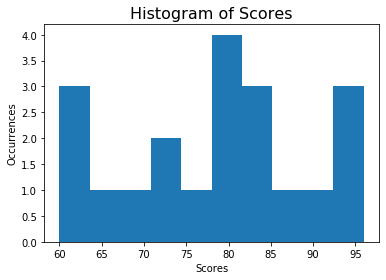

In [12]:
# Plot a histogram of the scores.

plt.hist(scores)
plt.xlabel("Scores")
plt.ylabel("Occurrences")
plt.title("Histogram of Scores", fontsize = 16)


plt.show()

In [ ]:
# Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.

# First thing, I'm using the letter score function I did previously:

In [46]:
# Define a function named get_letter_grade. 
# It should accept a number and return the letter grade associated with that number (A-F).

def get_letter_grade(x):
    #  x = int(x) found it interesting that adding this would allow me to use "80" as the function input and it would successfully complete the function.
    assert type(x) == int, "Please use an integer, not a float or letters"

    if x >= 90:
        return "A"
    elif x >= 80:
        return "B"
    elif x >= 70:
        return "C"
    elif x >= 60:
        return "D"
    elif x < 60:
        return "F"
    else:
        return "Please use integers, not a float or a letters"


assert get_letter_grade(85) == "B"
assert get_letter_grade(99) == "A"
print("Exercise is correct")


# For reference: I got the list of letter grade assignements from here:
# https://en.wikipedia.org/wiki/Academic_grading_in_the_United_States
# This specifically states that anything *below* a 60 is an F, but a 60 and above is a D. That's why the first grade is a D, not an F.

Exercise is correct


In [50]:
# Now need to use pandas and .apply() to iterate through the Series.
scores.apply(get_letter_grade)

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object

In [57]:
# Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, 
# and that many points should be given to every other score as well.

# I looked up the grade curve methodology online at wikipedia. Figured out the math on it and that it's just adding the "curve" to each grade, based on the difference between the highest grade possible - the highest grade achieved in the class.
# Thanks to my fellow students, especially Samuel who helped me out with this one during our own study session. 


score_curve = scores + (100 - scores.max())
score_curve

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

### 4. Use pandas to create a Series from the following string:

In [80]:
# Use pandas to create a Series from the following string:

strings = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))

In [81]:
type(strings)

pandas.core.series.Series

In [95]:
print(strings)

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object


In [96]:
# What is the most frequently occuring letter? Least frequently occuring?

strings.value_counts()

y    13
p    12
w    10
m     9
b     9
n     9
k     9
q     8
r     8
h     8
d     8
x     8
c     8
o     8
a     8
u     7
z     7
v     7
t     7
f     6
e     6
j     6
g     5
i     5
s     5
l     4
dtype: int64

In [82]:
strings.value_counts().sort_values()

l     4
s     5
i     5
g     5
f     6
e     6
j     6
v     7
t     7
z     7
u     7
d     8
r     8
a     8
h     8
o     8
q     8
x     8
c     8
n     9
k     9
b     9
m     9
w    10
p    12
y    13
dtype: int64

In [85]:
strings[strings.value_counts().nlargest(1)]

13    y
dtype: object

In [88]:
strings[strings.value_counts().nsmallest()]

# Something is wrong with this...

4    d
5    d
5    d
5    d
6    u
dtype: object

In [112]:
# How many vowels are in the list?
# Using my vowel check function from base python:

def is_vowel(value):
    vowels = ["a", "e", "i", "o", "u"]
    assert type(value) == str, "Input must be a string"
    if value.lower() in vowels:
        return True
    else:
        return False

strings[strings.apply(is_vowel)].count()

# I'm sure there's an easier way of doing this, but this seemed to work.

34

In [118]:
# How many consonants are in the list?

def is_consonant(value):
    are_vowels = ["a", "e", "i", "o", "u"]
    assert type(value) == str, "Input must be a string"
    if value.lower() not in are_vowels:
        return True
    else:
        return False
    
strings[strings.apply(is_consonant)].count()

166

In [121]:
# Create a series that has all of the same letters, but uppercased.

strings_upper = strings.str.upper()
strings_upper

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

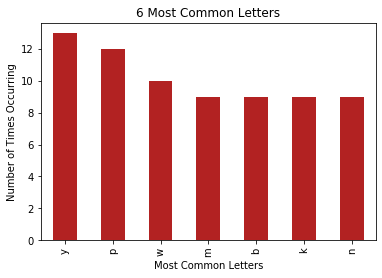

In [90]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.

letter_counts = strings.value_counts()
letter_counts[letter_counts > 8].plot.bar(color = 'firebrick')
plt.title("6 Most Common Letters")
plt.xlabel('Most Common Letters')
plt.ylabel('Number of Times Occurring')
plt.show()

# Took a long time working on this one... realized I was way over-thinking it. Should've used .head(6)...

### Complete the 17 exercises located at:

- https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a

In [6]:
fruits = pd.Series(['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange'])

numbers = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9])

In [7]:
type(numbers)
type(fruits)

pandas.core.series.Series

In [10]:
# Example for loop solution to add 1 to each number in the list

# Using Pandas:
numbers + 1

0       3
1       4
2       5
3       6
4       7
5       8
6       9
7      10
8      11
9      12
10     14
11     18
12     20
13     24
14    257
15     -7
16     -3
17     -1
18      6
19     -8
dtype: int64

In [214]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. 
# Make a variable named uppercased_fruits to hold the output of the list comprehension. 
# Output should be ['MANGO', 'KIWI', etc...]

fruits.str.upper()

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [ ]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output 
# like ['Mango', 'Kiwi', 'Strawberry', etc...]

In [280]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. 
# Hint: You'll need a way to check if something is a vowel.

# List comprehension method:
# fruits_with_more_than_two_vowels = [fruit for fruit in fruits if(
#     fruit.count("a") +
#     fruit.count("e") +
#     fruit.count("i") +
#     fruit.count("o") +
#     fruit.count("u")) > 2]

# fruits.str.count('[aeiou]') - this is what worked for the other vowel searches...

fruits_with_more_than_two_vowels = fruits[fruits.str.count('[aeiou]') > 2]
fruits_with_more_than_two_vowels

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [281]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. 
# The result should be ['mango', 'kiwi', 'strawberry']

fruits_with_only_two_vowels = fruits[fruits.str.count('[aeiou]') == 2]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

In [19]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters

fruits[fruits.str.len() > 5] # Simply taking the count of the element, and then vectorizing (iterating) the len() operation through the series.

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [23]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters

fruits[fruits.str.len() == 5] # Same code, except we are looking for exactly 5 characters

0    mango
3    guava
dtype: object

In [26]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters

fruits[fruits.str.len() < 5] # Same code as above, looking for less than 5 characters

1    kiwi
dtype: object

In [27]:
# Exercise 8 - Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]

fruits.str.len()

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [31]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"

fruits_with_letter_a = fruits[fruits.str.contains('a')]
fruits_with_letter_a

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [11]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 

even_numbers = numbers[numbers % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [16]:
# numbers[(numbers % 2 == 0) & (numbers > 0)] - if I wanted only positive even numbers...

In [43]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers

odd_numbers = numbers[numbers % 2 == 1]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [46]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers

positive_numbers = numbers[numbers > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [47]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers

negative_numbers = numbers[numbers < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

### Exercise 14 - use a pandas Series to produce a list of numbers with 2 or more numerals.

In [93]:
# Since we're working with integers, we know that -9 through 9 are the only single digit numbers.

In [99]:
# The series we're working with:
numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
15     -8
16     -4
17     -2
18      5
19     -9
dtype: int64

In [100]:
# Need to get a True/False list (Boolean Mask)

numbers.between(-9, 9)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18     True
19     True
dtype: bool

In [ ]:
# Except this is the opposite of the mask we need, since this is finding int's that have 1 digit only.

In [102]:
# Now, when we use tilde to find the completment of the boolean mask, (reverse of the .between() function's output)
# we get this:

~numbers.between(-9, 9)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [77]:
# Got help from the "exocortex", and learned that using the tilde key (~) reverses the conditions of an argument.
# Tilde is called a "complement operator" meaning it takes one bit operand and returns its complement. (Opposite)

In [72]:
# Now we're ready to use the vectorized operations on the series:

In [101]:
# Exercise 14 - use a a pandas Series to produce a list of numbers with 2 or more numerals.

numbers_two_digits = numbers[~numbers.between(-9, 9)]
numbers_two_digits

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

In [ ]:
# Summary of process:

# Instead of combining bitwise operators (and == &, or == |), I inverted the boolean mask by using the tilde (~). 
# In plain English, what this code is now saying as it vectorizes (iterates) through the series:
# "Is this number in the 'numbers' series NOT IN (~) BETWEEN the range of -9 to 9?"
# numbers.between(-9, 9) returns all single digit numbers as True, and all 2 digit numbers as False, so I had to revserse that boolean mask. The tilde '~' does that action.

# Source: https://stackoverflow.com/questions/32980087/pandas-not-in-in-and-between
# Keywords: bitwise operators and ~ revserse boolean mask.

In [107]:
# Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]

numbers_squared = numbers ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [123]:
# # Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.

# odd_negative_numbers = 

odd_negative_numbers = numbers[(numbers % 2 == 1)]
odd_negative_numbers = odd_negative_numbers[numbers < 0]
odd_negative_numbers

# I should be able to use .any() with this...

19   -9
dtype: int64

In [9]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 

numbers_plus_5 = numbers + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

In [116]:
# BONUS Make a variable named "primes" that is a list containing the prime numbers in the numbers list. 
# *Hint* you may want to make or find a helper function that determines if a given number is prime or not.

numbers = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9])

# My attempts at using a function. Deleted most of the other work on this, but eventually got stuck.
# def prime_number(number):
#     num = [n for n in range(1, 101)]
#     count = 0
#     for n in num:
#         if number % n == 0:
#             count = count + 1
#     return count

primes = numbers[numbers.apply(isprime)]
primes

# I did find the isprime function in my google searches, but wanted to try another way first. 
# Tried using a function, but got stuck. I'm shamelessly using the isprime function from the sympy library as Gilbert/Brandon suggested.

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
18     5
dtype: int64